# Basic Plots

we are going to go through the different types of simple plots. This includes bar charts, pie charts, stacked bar, and area charts, histograms, box plots, scatter plots and bubble plots. Please refer to the previous chapter to get more details about these plots. More sophisticated plots, such as violin plots, will be covered in the next chapter, using Seaborn instead of Matplotlib.

## Bar Chart

The [`plt.bar(x, height, [width])`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) creates a vertical bar plot. For horizontal bars, use the [`plt.barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html) function.

**Important parameters**:

- `x`: Specifies the x coordinates of the bars
- `height`: Specifies the height of the bars
- `width (optional)`: Specifies the width of all bars; the default is 0.8

In [6]:
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 4 artists>

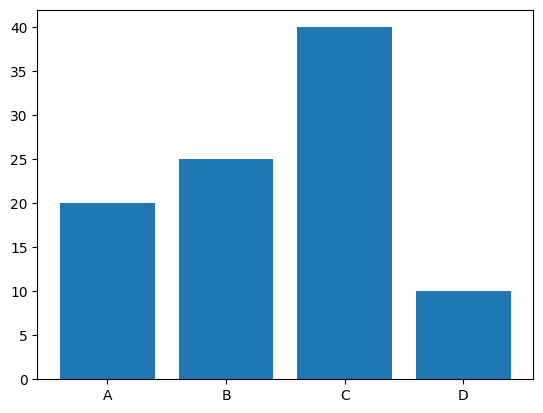

In [4]:
plt.bar(['A', 'B', 'C', 'D'], [20, 25, 40, 10])

If you want to have subcategories, you have to use the plt.bar() function multiple times with shifted x-coordinates. This is done in the following example and illustrated in the figure that follows. The arange() function is a method in the NumPy package that returns evenly spaced values within a given interval. The gca() function helps in getting the instance of current axes on any current Figure. The set_xticklabels() function is used to set the x-tick labels with the list of given string labels.

[Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C'), Text(3, 0, 'D')]

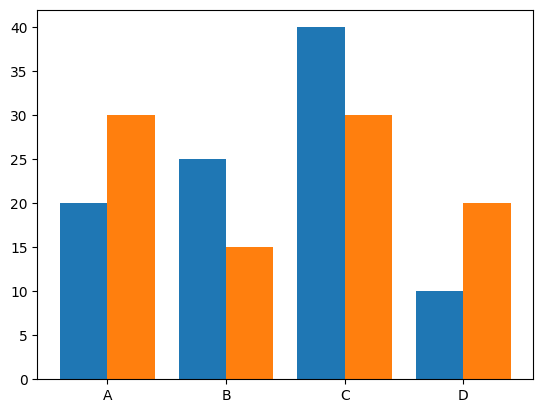

In [7]:
labels = ['A', 'B', 'C', 'D']

x = np.arange(len(labels))

width = 0.4

plt.bar(x - width / 2, [20, 25, 40, 10], width=width)

plt.bar(x + width / 2, [30, 15, 30, 20], width=width)

# Ticks and tick labels must be set manually

plt.xticks(x)

ax = plt.gca()

ax.set_xticklabels(labels)

### Exercise

In this exercise, you will generate a bar plot to compare movie scores. You will be given five movies with scores from Rotten Tomatoes. The Tomatometer is the percentage of approved Tomatometer critics who have given a positive review for a movie. The Audience Score is the percentage of users who have given a score of 3.5 or higher, out of 5. Compare these two scores among the five movies.

The following are the steps to perform:

1. Import the necessary modules and enable plotting within a Jupyter Notebook.
2. Use pandas to read the data located in the Datasets subfolder.
3. Use Matplotlib to create a visually appealing bar plot comparing the two scores for all five movies.
4. Use the movie titles as labels for the x-axis. Use percentages at intervals of 20 for the y-axis and minor ticks at intervals of 5. Add a legend and a suitable title to the plot.
5. Use functions that are required to explicitly specify the axes. To get the reference to the current axes, use `ax = plt.gca()`. To add minor y-ticks, use `Axes.set_yticks([ticks], minor=True)`. To add a horizontal grid for major ticks, use `Axes.yaxis.grid(which='major')`, and to add a dashed horizontal grid for minor ticks, use `Axes.yaxis.grid(which='minor', linestyle='--')`.

The expected output is as below: 

<img src='images/ex2_output.png' width=60% />

In [9]:
## TODDO 



### Solution

Click on the '...' below to see the solution.

Text(0.5, 1.0, 'Movie Comparison')

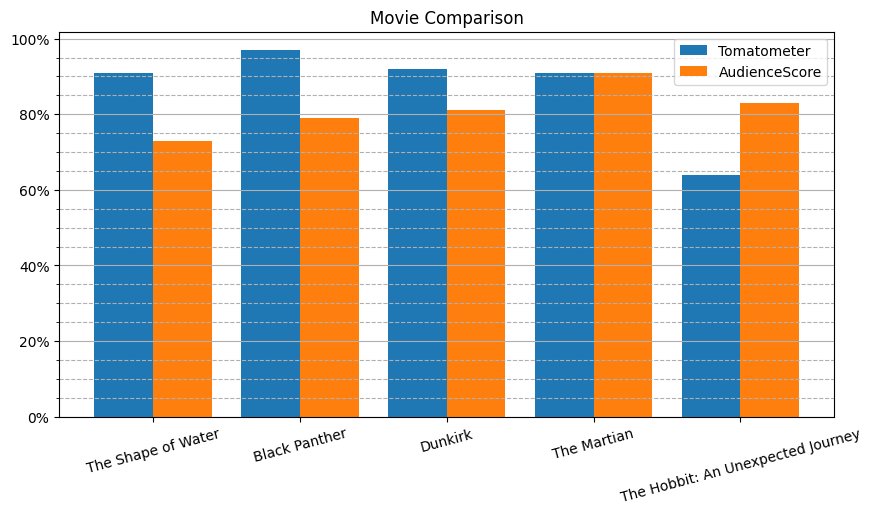

In [56]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv('datasets/movie_scores.csv', index_col=0 )
df.head()
plt.figure(figsize=(10, 5))
xpos = np.arange(len(df['MovieTitle']))
ypos = np.arange(0,101,20) 
width = 0.4
plt.bar(x - width / 2, df['Tomatometer'], width=width, label='Tomatometer')
plt.bar(x + width / 2, df['AudienceScore'], width=width, label='AudienceScore')

plt.xticks(xpos, labels=df['MovieTitle'], rotation=15)
plt.yticks(ypos, labels=['0%','20%','40%','60%','80%','100%'])

ax = plt.gca()
ax.set_yticks(np.arange(0, 101, 5), minor=True)
ax.yaxis.grid(which='major')
ax.yaxis.grid(which='minor', linestyle='--')

plt.legend()
plt.title('Movie Comparison')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\markk\miniconda3\envs\dlenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data = pd.read_csv('datasets/movie_scores.csv', index_col=0)

In [ ]:
data.head(20)

,MovieTitle,Tomatometer,AudienceScore
0,The Shape of Water,91,73
1,Black Panther,97,79
2,Dunkirk,92,81
3,The Martian,91,91
4,The Hobbit: An Unexpected Journey,64,83


Transform the data into a useable format for Seaborn's barplot function.

Use Seaborn to create a visually appealing bar plot that compares the two scores for all five movies.
After executing the preceding steps, the expected output should appear as follows:

<img src='images/bar_plot1.jpg' width=70% />

In [ ]:

df_long = pd.melt(data, id_vars='MovieTitle', value_vars=['AudienceScore', 'Tomatometer'], var_name='Type', value_name='Scores', ignore_index = True)

In [ ]:
df_long

,MovieTitle,Type,Scores
0,The Shape of Water,AudienceScore,73
1,Black Panther,AudienceScore,79
2,Dunkirk,AudienceScore,81
3,The Martian,AudienceScore,91
4,The Hobbit: An Unexpected Journey,AudienceScore,83
5,The Shape of Water,Tomatometer,91
6,Black Panther,Tomatometer,97
7,Dunkirk,Tomatometer,92
8,The Martian,Tomatometer,91
9,The Hobbit: An Unexpected Journey,Tomatometer,64


<AxesSubplot:title={'center':'Movie Score Comparison'}, xlabel='MovieTitle', ylabel='Scores'>

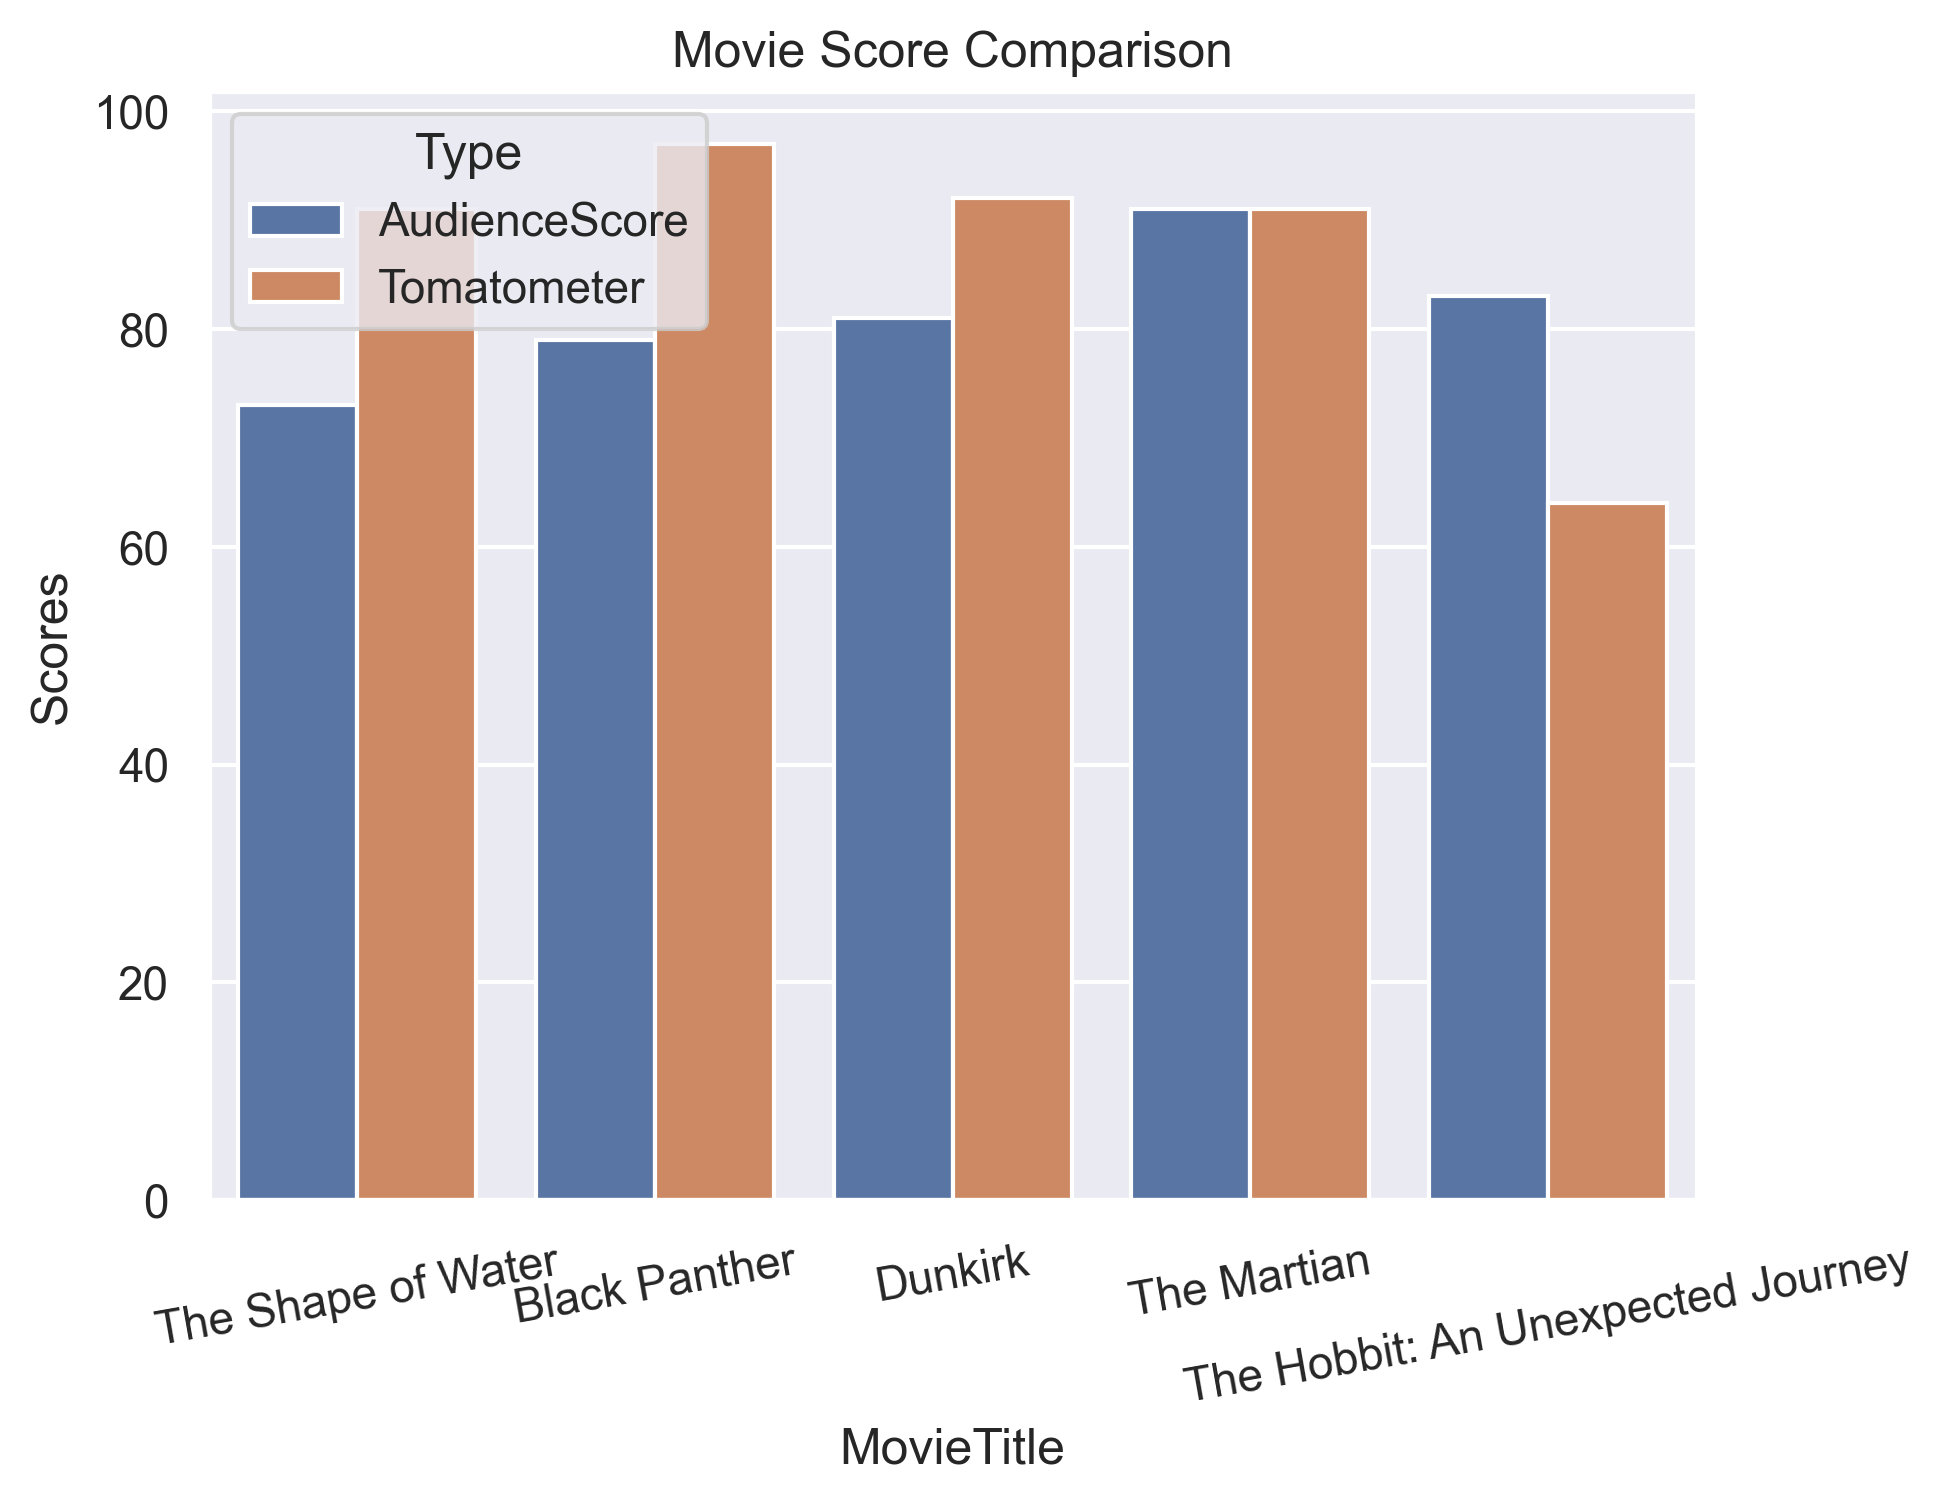

In [ ]:
sns.set_theme()
plt.figure(dpi=300)
plt.xticks(rotation=10)
plt.title('Movie Score Comparison')
sns.barplot(x='MovieTitle', y='Scores', hue='Type', data=df_long)